# Assignment 3

## Question 1: Frequency Domain Smoothing (Lowpass Filtering)

In this notebook, I (Aimal Khan) apply three types of lowpass filters in the frequency domain to smooth a grayscale image and compare their results.


## Explanation

-   Frequency domain filtering means transforming the image to frequency space using Fourier Transform.
-   Noise is mostly in high-frequency components, so lowpass filters remove or reduce those.
-   We will use:
    1. Ideal Lowpass Filter (ILPF) - sharp cutoff
    2. Butterworth Lowpass Filter (BLPF) - smooth cutoff, order=2
    3. Gaussian Lowpass Filter (GLPF) - smoothest cutoff
-   Then we convert back to image domain using inverse FFT.
-   Finally, we compare filtered images and their magnitude spectra.


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load grayscale image
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not found or unable to open.")
    exit()

### Get image size and compute the center point

We find the number of rows and columns, then calculate the center coordinates. This helps us center the frequency transform.


In [15]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

### Compute the Fourier Transform and shift the zero frequency to center

This converts the image to the frequency domain and centers the low frequencies.


In [16]:
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

### Create frequency grid matching image size

We create coordinate grids for frequency components ensuring the grid size matches the image size exactly to avoid shape mismatch errors.


In [17]:
u = np.arange(-ccol, cols - ccol)
v = np.arange(-crow, rows - crow)
U, V = np.meshgrid(u, v)
D = np.sqrt(U**2 + V**2)

Step 4: Define cutoff frequency and create lowpass filters

-   Set cutoff frequency `D0 = 50`
-   Create Ideal, Butterworth (order 2), and Gaussian lowpass filters using the distance grid.


In [18]:
D0 = 50
ILPF = np.zeros_like(D)
ILPF[D <= D0] = 1

n = 2
BLPF = 1 / (1 + (D / D0)**(2 * n))

GLPF = np.exp(-(D**2) / (2 * (D0**2)))

### Apply filters in frequency domain

Multiply the Fourier transformed image with each lowpass filter mask.


In [19]:
filtered_ILPF = dft_shift * ILPF
filtered_BLPF = dft_shift * BLPF
filtered_GLPF = dft_shift * GLPF

### Define a function to perform inverse FFT

This function shifts frequency back and converts from frequency domain to image domain.


In [20]:
def inverse_fft(filtered):
    f_ishift = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = np.uint8(np.clip(img_back, 0, 255))
    return img_back

### Get filtered images by applying inverse FFT

Convert the filtered frequency images back to spatial domain.


In [21]:
img_ILPF = inverse_fft(filtered_ILPF)
img_BLPF = inverse_fft(filtered_BLPF)
img_GLPF = inverse_fft(filtered_GLPF)

### Original Image and Frequency Spectrum

We start by showing the original grayscale image and its magnitude spectrum in frequency domain.
Magnitude spectrum shows how frequencies are distributed in the image.


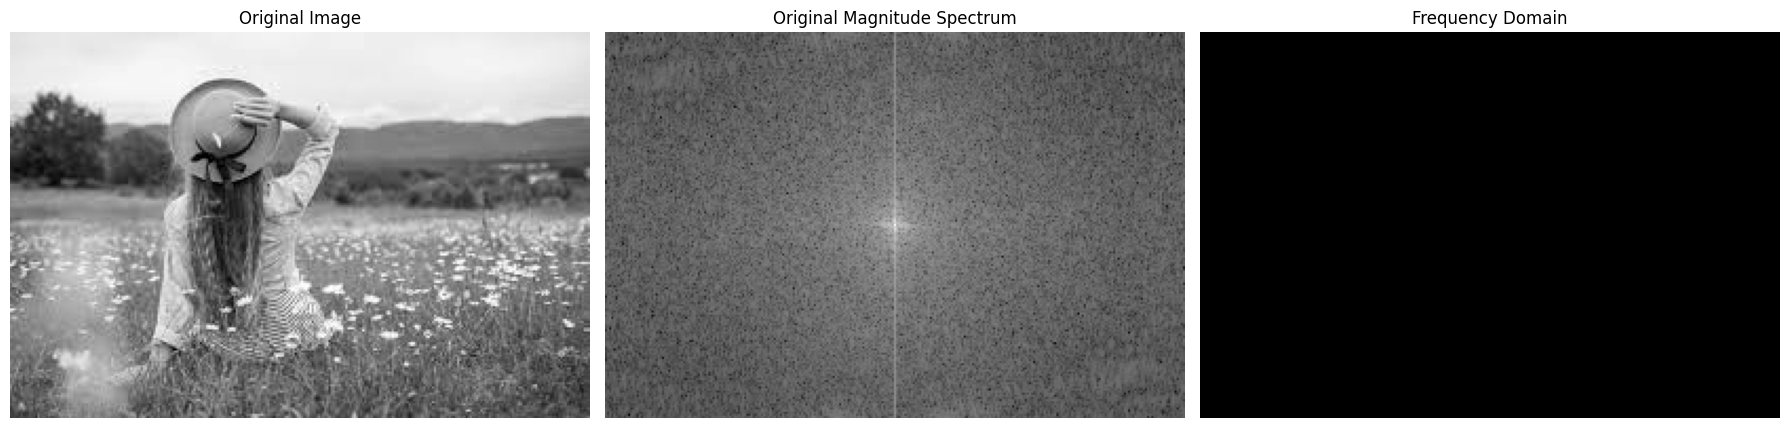

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(dft_shift)), cmap='gray')
plt.title('Original Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.zeros_like(image), cmap='gray') 
plt.title('Frequency Domain')
plt.axis('off')

plt.tight_layout()
plt.show()

### Ideal Lowpass Filter (ILPF)

-   Sharp cutoff filter: keeps frequencies inside cutoff, blocks outside.
-   This often causes ringing artifacts and edge distortion.
-   Below are the filtered image, magnitude spectrum after filtering, and the filter shape.


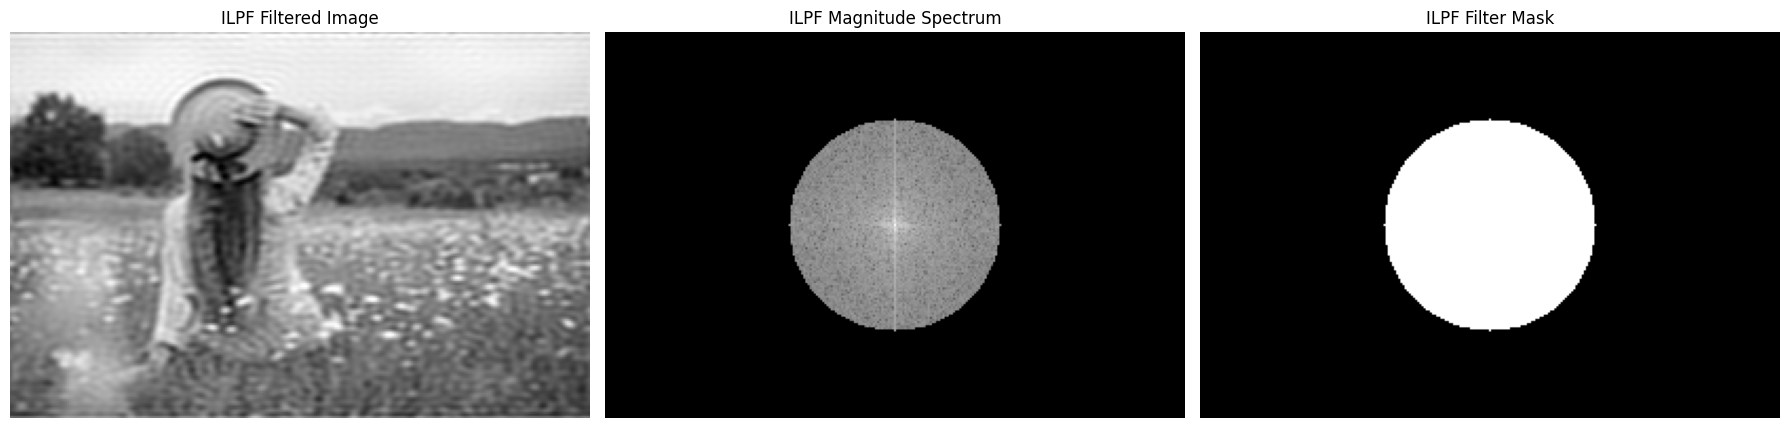

In [23]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_ILPF, cmap='gray')
plt.title('ILPF Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(filtered_ILPF)), cmap='gray')
plt.title('ILPF Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ILPF, cmap='gray')
plt.title('ILPF Filter Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

### Butterworth Lowpass Filter (BLPF), Order = 2

-   Smooth cutoff filter reduces ringing artifacts compared to ILPF.
-   Balances noise reduction and edge preservation.
-   Below are the filtered image, magnitude spectrum, and filter shape.


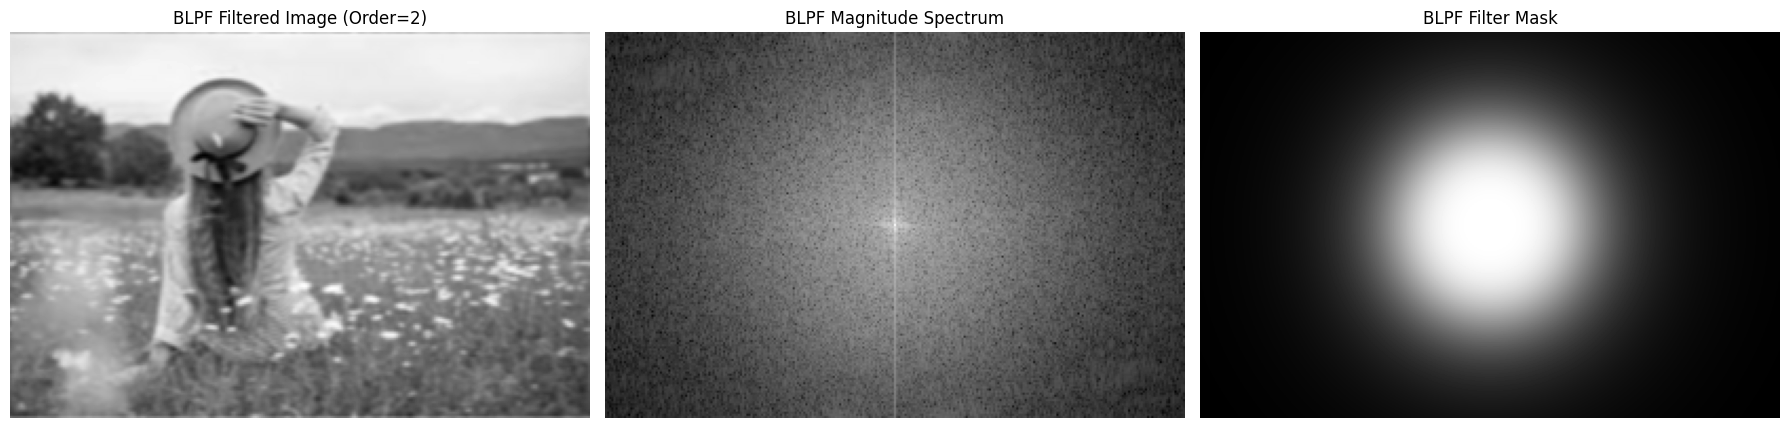

In [24]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_BLPF, cmap='gray')
plt.title('BLPF Filtered Image (Order=2)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(filtered_BLPF)), cmap='gray')
plt.title('BLPF Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(BLPF, cmap='gray')
plt.title('BLPF Filter Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

### Gaussian Lowpass Filter (GLPF)

-   Smoothest filter with a Gaussian curve.
-   Best for smooth noise reduction and edge preservation but may cause slight blurring.
-   Below are the filtered image, magnitude spectrum, and filter shape.


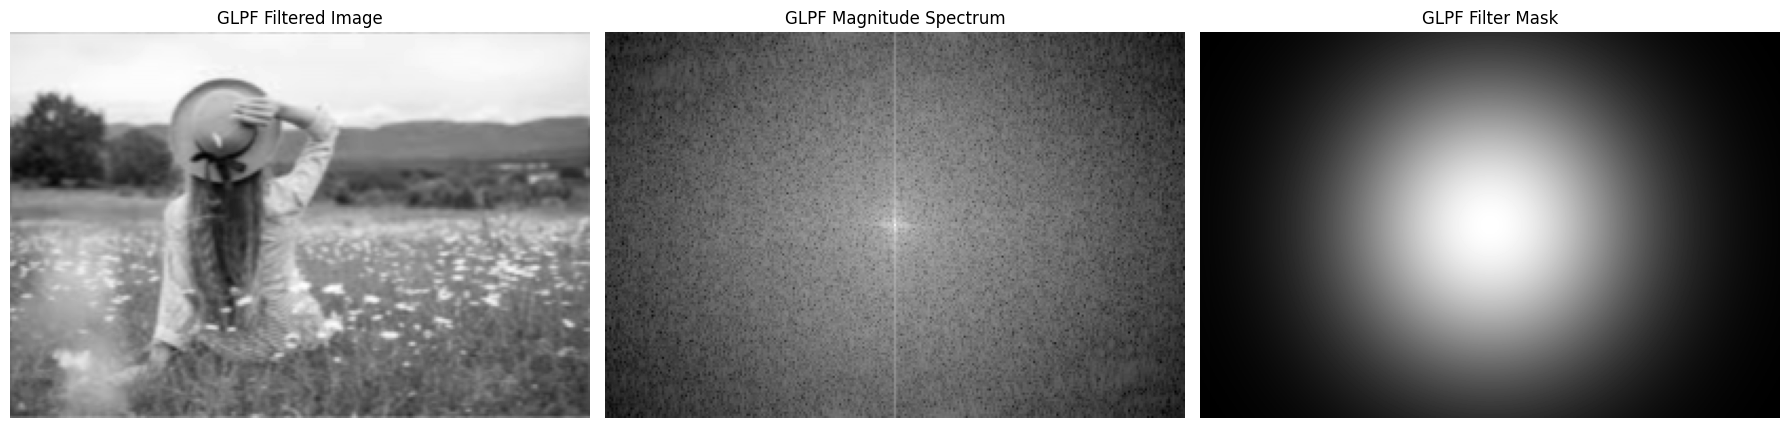

In [25]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_GLPF, cmap='gray')
plt.title('GLPF Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(filtered_GLPF)), cmap='gray')
plt.title('GLPF Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(GLPF, cmap='gray')
plt.title('GLPF Filter Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

## Analysis

-   ILPF cuts frequencies sharply which may cause ringing and edge distortions.
-   BLPF smoothens cutoff, reducing artifacts while still reducing noise well.
-   GLPF is smoothest, best at preserving edges with less noise but may blur more.
-   Gaussian filter is usually best for smooth noise reduction with minimal edge loss.
